In [1]:
# 使用LR模型对Avazu CTR进行预估
import pandas as pd
import numpy as np
from dummyPy import OneHotEncoder  # 超大规模数据one-hot编码
from sklearn.linear_model import SGDClassifier  # 梯度下降分类
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt 
import pickle

In [2]:
##==================== 设置文件路径File-Path (fp) ====================##
file_path = '/Users/wangjian/Desktop/avazu/' 
fp_train_f = file_path + "train_f.csv"
fp_test_f  = file_path + "test_f.csv"

# one-hot编码保存
fp_oh_enc = file_path + "oh_enc"
# LR模型保存
fp_lr_model = file_path + "lr/lr_model"
# submission文件保存
fp_sub = file_path + "lr/LR_submission.csv"


In [3]:
##==================== LR 训练 ====================##
oh_enc = pickle.load(open(fp_oh_enc, 'rb'))

In [4]:
# 一个chunk块为5万行
chunksize = 50000
df_train_f = pd.read_csv(fp_train_f, dtype={'id':str}, index_col=None, chunksize=chunksize, iterator=True)

In [14]:
print(df_train_f)

In [5]:
# 使用LogLoss作为LR的损失函数
lr_model = SGDClassifier(loss='log')  
scores = []

In [6]:
# 使用k和i调整训练规模，训练样本 = 所有样本 / k
k = 100  
i = 1
for chunk in df_train_f:
    # 根据K drop掉样本  4000万个样本， 每个chunk5万，循环800次，k-100，则取8次chunk
    if i < k: 
        i += 1
        continue
    print('training...')
    i = 1
    df_train = oh_enc.transform(chunk)
    # LR训练
    feature_train = df_train.columns.drop(['id', 'click'])
    train_X = df_train[feature_train]
    train_y = df_train['click'].astype('int')
    lr_model.partial_fit(train_X, train_y, classes = [0,1])  # fitting
    
    # 训练结果logloss分数
    y_pred = lr_model.predict_proba(train_X)[:, 1]
    score = log_loss(train_y, y_pred)
    scores.append(score)

training...
training...
training...
training...
training...
training...
training...
training...


In [9]:
## 存储训练好的LR模型
pickle.dump(lr_model, open(fp_lr_model, 'wb'))
print('LR model saved')

LR model saved


[0.4470817671157666, 0.6021655638045901, 0.46993764719183884, 0.44542040145538964, 0.4468685262148862, 0.39244292044034795, 0.4140450408470022, 0.49329205048261326]


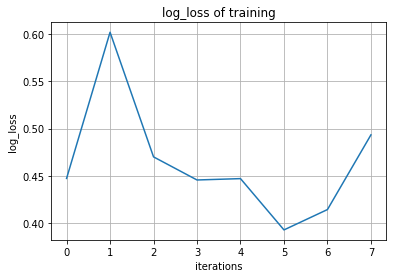

In [10]:
print(scores)
#scores = [0.1, 0.2, 0.3, 0.4]
## 绘制LR训练分数曲线
#f1 = plt.figure(1)
plt.title("LR Training Curve") 
plt.plot(scores)
plt.xlabel('iterations')
plt.ylabel('log_loss')
plt.title('log_loss of training')
plt.grid()
plt.show()

In [15]:
import gc
del lr_model
del df_train_f
gc.collect()

##==================== 使用训练好的LR模型进行预测，提交submission ====================##
df_test_f = pd.read_csv(fp_test_f, dtype={'id':str}, index_col=None, chunksize=chunksize, iterator=True)        
lr_model = pickle.load(open(fp_lr_model, 'rb'))

In [16]:
# 按照chunk对测试集进行预测
header = True
for chunk in df_test_f:
    print('predicting...')
    df_test = oh_enc.transform(chunk)
    # 去掉ID字段
    feature_test = df_test.columns.drop(['id'])
    test_X = df_test[feature_test]
    # 计算class=1的概率
    y_pred = lr_model.predict_proba(test_X)[:, 1]  
    # 得到submittion
    chunk['click'] = y_pred
    with open(fp_sub, 'a') as f: 
        # 只有第一次header=True，其余header=False
        chunk.to_csv(f, columns=['id', 'click'], header=header, index=False) 
    header = False

print('submittion completed')

predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predic

SyntaxError: invalid syntax (<ipython-input-17-9ce1f20b6c79>, line 1)